**ECONOMETRÍA FINANCIERA**

**Modelos univariados de volatilidad**

Apuntes de: Alejandro Vargas Sanchez, PhD

alejandro.vargas@upb.edu

**1. INTRODUCCIÓN**

La modelización de series de tiempo financieras presenta una complejidad significativa, derivada no solo de la diversidad de series en uso (acciones, tipos de cambio, tasas de interés), sino también de la importancia de la frecuencia de las observaciones (segundos, minutos, horas, días, meses, etc.) y la disponibilidad de grandes conjuntos de datos. Esta complejidad se refleja en las regularidades estadísticas o hechos estilizados, como la existencia de una varianza condicional, es decir, una varianza que depende de su propio pasado.

Desde el trabajo pionero de Engle en 1982 sobre los modelos **ARCH**, la literatura econométrica ha puesto un énfasis considerable en comprender la dinámica temporal de la volatilidad y en desarrollar herramientas para su medición, modelización y predicción. Estos avances fueron impulsados por la observación empírica de que la volatilidad en los rendimientos de los activos financieros es persistente y condicional, fenómeno observado en diferentes activos, periodos y mercados.

La **volatilidad de los retornos de los activos** es un concepto fundamental en finanzas, crucial para la valoración de activos, la construcción de portafolios de inversión y la gestión de riesgos financieros. Por tanto, los **modelos econométricos univariados de volatilidad**, como los modelos **ARCH** y **GARCH**, adquieren una importancia particular. Estos modelos permiten capturar la persistencia y condicionalidad de la volatilidad, ofreciendo herramientas robustas para el análisis y la predicción de riesgos, esenciales para la toma de decisiones financieras informadas.

El Jupyter Notebook proporcionado titulado **"ECONOMETRÍA FINANCIERA - Modelos univariados de volatilidad"** comprende una exploración detallada de los modelos de volatilidad univariados en econometría financiera. Este cuaderno está diseñado para proporcionar información y aplicaciones prácticas de varios modelos de volatilidad.


**2. IMPORTAR LIBRERÍAS**

**yahoo finance:** para poder descargar los datos de mercado de los instrumentos financieros.
https://finance.yahoo.com/

**pandas:** para análisis y manipulación de datos (Series, DataFrame, cleaning, transformation, aggregation, merging).

**matplotlib:** para realizar gráficas en Python. Proporciona un conjunto completo de herramientas para crear visualizaciones estáticas, interactivas y animadas en varios formatos, incluidos diagramas de líneas, gráficos de barras, histogramas y diagramas de dispersión.

**scipy.stats:** proporciona una amplia gama de funciones y métodos estadísticos. Incluye herramientas para estadística descriptiva, distribuciones de probabilidad (tanto continuas como discretas), pruebas estadísticas, funciones de correlación, pruebas de hipótesis, calcular medidas estadísticas y ajustar datos a diversas distribuciones.

**numpy:** es una biblioteca fundamental para la computación numérica en Python. Proporciona soporte para matrices, matrices y una amplia gama de funciones matemáticas para operar en estas estructuras de datos. NumPy es muy eficiente para cálculos numéricos, lo que lo hace esencial para tareas de informática científica, análisis de datos y aprendizaje automático. Las características clave incluyen potentes objetos de matriz de n dimensiones, transmisión, funciones de álgebra lineal, generación de números aleatorios e integración con otras bibliotecas de informática científica como SciPy y Pandas.

**statsmodels.graphics.tsaplots:** es un módulo dentro de la biblioteca Statsmodels que proporciona herramientas para visualizar datos de series temporales. Incluye funciones para crear gráficos de autocorrelación (ACF) y gráficos de autocorrelación parcial (PACF), que son esenciales para identificar la correlación entre observaciones en una serie de tiempo con diferentes rezagos. Estos gráficos son cruciales para el análisis de series de tiempo, particularmente en la identificación y diagnóstico de modelos, como en el modelado ARIMA que se presenta en la siguiente ecuación:

$X_t = c + \epsilon_t + \sum_{i=1}^{p} \phi_i \cdot X_{t-i} + \sum_{j=1}^{q} \theta_j \cdot \epsilon_{t-j}$

**statsmodels.tsa.stattools:** es un módulo de la biblioteca Statsmodels que ofrece varias herramientas estadísticas para el análisis de series de tiempo. Las funciones clave incluyen autocorrelación y la autocorrelación parcial, adfuller para la prueba aumentada de Dickey-Fuller para verificar la estacionariedad, grangercausalitytests para probar la causalidad de Granger y q_stat para la prueba de Ljung-Box para detectar la autocorrelación, como se presenta en la siguiente ecuación:

$\Delta X_t = \alpha + \beta t + \gamma X_{t-1} + \sum_{i=1}^{p} \delta_i \Delta X_{t-i} + \epsilon_t$





In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, q_stat
from statsmodels.tsa.stattools import adfuller, kpss
warnings.filterwarnings("ignore")

Se puede obtener mayor información sobre la documentación de las librerías en los siguientes enlaces:

Pandas: https://pandas.pydata.org/docs/user_guide/index.html

NumPy: https://numpy.org/devdocs/user/index.html

Matplotlib: https://matplotlib.org/stable/users/explain/quick_start.html

Statsmodels: https://www.statsmodels.org/stable/index.html

SciPy: https://docs.scipy.org/doc/scipy/

yfinance: https://pypi.org/project/yfinance/

ARCH: https://arch.readthedocs.io/en/latest/

**3. DESCARGA DE DATOS**

**3.1. ELECCIÓN DE LA SERIE DE TIEMPO**

Se debe elegir un instrumento financiero para descargar su información de mercado:


1.   Acciones (Stocks)
2.   Futuros (Futures)
3.   Indices (Index)
4.   Tipos de Cambio (Currencies)
5.   Títulos del Tesoro (US Treasuries)
6.   Activos digitales (Crypto)

Cada instrumento tiene un código o ticker, por ejemplo las acciones de la empresa Coca-Cola tienen el ticker de **KO**, o el tipo de cambio entre el dólar americano y el euro es **EURUSD=X**.

Se puede obtener una lista de códigos en el siguiente enlace: https://stockanalysis.com/stocks/

Descargaremos los datos y los almacenaremos en **data**, para lo cual se utilizará la función download que requiere el ticker y el periodo de tiempo.

**3.2. FRECUENCIA Y LONGITUD DE LOS DATOS**

Al decidir la **frecuencia** de los datos (por ejemplo entre datos diarios y mensuales) para estimar la volatilidad, ambas opciones tienen distintas ventajas y desventajas. Los **datos diarios** ofrecen una vista detallada de la dinámica y la volatilidad del mercado, capturando fluctuaciones diarias y eventos a corto plazo. Estos datos de alta frecuencia permiten una **stimación más precisa de los modelos de volatilidad**, especialmente aquellos que se basan en datos de alta frecuencia como GARCH, y son útiles para la gestión de riesgos y estrategias comerciales a corto plazo debido a su sensibilidad a los cambios repentinos del mercado. Sin embargo, los datos diarios pueden incluir mucho ruido y fluctuaciones no informativas, lo que potencialmente oscurece las tendencias subyacentes, y su análisis puede ser computacionalmente intensivo, lo que requiere modelos sofisticados para filtrar el ruido. Por otro lado, los **datos mensuales** reducen el ruido y las fluctuaciones a corto plazo, proporcionando una imagen más clara de las tendencias y **ciclos a largo plazo**. Es más fácil de manejar y analizar, requiere menos potencia computacional y modelos más simples, y ofrece estimaciones más estables para decisiones de inversión a largo plazo. Sin embargo, la menor frecuencia de los datos mensuales pasa por alto la dinámica diaria del mercado y los eventos de corto plazo, lo que potencialmente pasa por alto importantes picos de volatilidad.

Al decidir la  **longitud** de duración del período de muestra para la estimación de la volatilidad, tanto los períodos más largos como los más cortos tienen distintos beneficios e inconvenientes, con un problema subyacente de error de muestreo. Un período de muestra más largo, como **cinco años**, proporciona **solidez al capturar múltiples ciclos de mercado y reducir el impacto de las anomalías, lo que conduce a modelos más confiables y generalizables**. Cubre una gama más amplia de condiciones de mercado, incluidos los mercados alcistas y bajistas, y ayuda a estimar tendencias y patrones de volatilidad a largo plazo. Sin embargo, los datos más antiguos podrían volverse menos relevantes para las condiciones actuales del mercado, especialmente en mercados que cambian rápidamente, y el manejo de un conjunto de datos más grande puede ser computacionalmente intensivo y requerir más almacenamiento. Por otro lado, un período de muestra más corto, como tres años, ofrece relevancia al centrarse en datos más recientes, lo que hace que sea probable que se alinee mejor con las condiciones y tendencias actuales del mercado. Es más fácil de manejar, requiere menos potencia computacional y almacenamiento y permite que los modelos se adapten más rápidamente a las condiciones cambiantes del mercado. Sin embargo, los períodos más cortos capturan menos ciclos de mercado, lo que puede conducir a modelos menos sólidos y confiables, y las estimaciones podrían ser más sensibles a anomalías recientes, lo que resultaría en una mayor varianza y menos estabilidad en el tiempo. Según Poon y Granger (2003), períodos de muestra más largos ayudan a estabilizar las estimaciones de los modelos de volatilidad, proporcionando pronósticos más confiables, mientras que Hamilton (1994) destaca que los mercados financieros experimentan regímenes diferentes, y una muestra más larga puede capturar estos cambios, haciendo que los modelos más robusto. Sin embargo, ambos enfoques deben considerar cuidadosamente el equilibrio entre el error de muestreo, la relevancia y la solidez para garantizar una estimación precisa y confiable de la volatilidad.

**3.3. DESCARGA**

La función **yf.download** te permite configurar la descarga con las siguientes opciones:

Usando period: El parámetro de período le permite especificar una cantidad de tiempo fija en relación con la fecha actual. Los valores posibles son:

'1d': 1 day

'5d': 5 days

'1mo': 1 month

'3mo': 3 months

'6mo': 6 months

'1y': 1 year

'2y': 2 years

'5y': 5 years

'10y': 10 years

'ytd': Year to date (from the beginning of the current year to the current date)

'max': Maximum available data

Usando inicio y fin: Alternativamente, puede especificar rangos de fechas exactos utilizando los parámetros de inicio y finalización. Estos parámetros aceptan fechas en el formato 'YYYY-MM-DD' u objetos de fecha y hora.

start: (e.g., '2020-01-01') end: (e.g., '2021-01-01')

data = yf.download('TSLA', period='1y')

data = yf.download('TSLA', start='2020-01-01', end='2021-01-01')

**EN EL SEGUIENTE CÓDIGO SE PUEDE CAMBIAR EL TICKER DE LA EMPRESA**

In [2]:
#Descargamos datos diarios para un periodo de 5 años
ticker = "WMT" #Puedes cambiar el ticker a la acción que desees
data = yf.download(ticker, period="5y")

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-03,33.876667,34.226665,33.799999,33.986668,31.395344,19844100
2019-06-04,34.203335,34.216667,33.813332,34.186668,31.580093,17894700
2019-06-05,34.250000,34.926666,34.200001,34.806667,32.152813,20708700
2019-06-06,34.830002,35.220001,34.733334,35.036667,32.365284,24191100
2019-06-07,35.076668,35.453335,35.016666,35.353333,32.657810,20428200
...,...,...,...,...,...,...
2024-05-24,65.129997,65.690002,65.010002,65.379997,65.379997,11793800
2024-05-28,65.220001,65.470001,64.739998,65.040001,65.040001,13349600
2024-05-29,64.750000,65.209999,64.650002,64.919998,64.919998,11538600


**3.4. VALORES DE CIERRE DE MERCADO**

Creamos una estructura de datos (DataFrame) y la llamaremos **df**, en la cual extraeremos los precios o valores de cierre de mercado.

Cada fila estará relacionada a una fecha, por lo que usaremos pandas para que el **index** muestre las fechas de los precios.

In [4]:
df=data[['Close']]
df.index=pd.to_datetime(df.index)
df.head()

,Close
Date,
2019-06-03,33.986668
2019-06-04,34.186668
2019-06-05,34.806667
2019-06-06,35.036667
2019-06-07,35.353333


**4. ANÁLISIS INICIAL DE LOS DATOS**

**4.1. GRÁFICAS**

Vamos a graficar la serie de tiempo, usando la función **plt.plot** de la librería **matplotlib**.

Definimos el tamaño utilizando figsize: 10 de ancho y 5 de alto.

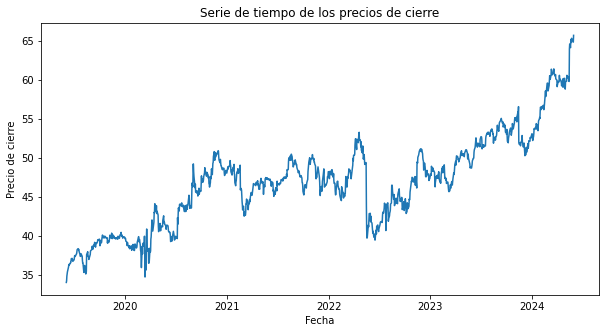

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Serie de tiempo de los precios de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

Vamos a graficar un diagrama de distribución de frecuencias, usando la función **plt.hist**.

Se dividirá en un total de 50 intervalos (bins=50) de igual ancho para el histograma.



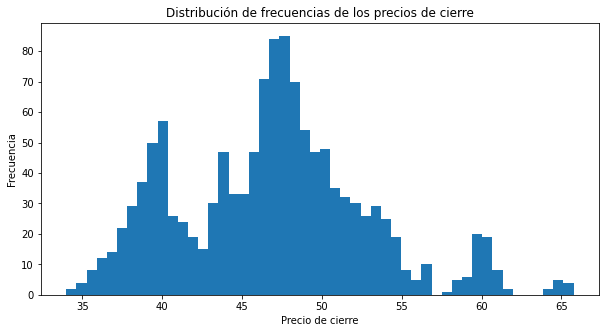

In [6]:
plt.figure(figsize=(10,5))
plt.hist(df['Close'], bins=50)
plt.title('Distribución de frecuencias de los precios de cierre')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.show()

**4.2. ESTADÍSTICAS DESCRIPTIVAS**

Utilizado la librería de **pandas** a continuación se presenta una tabla con las estadísticas descriptivas.

In [7]:
df.describe()

,Close
count,1259.000000
mean,46.869513
std,5.938141
min,33.986668
25%,42.796667
50%,47.016666
75%,50.171665
max,65.760002


Usando la librería de **pandas** podemos presentar otro resumen de estadísticas descriptivas.

In [8]:
n_obs = len(df)
period = df.index[-1] - df.index[0]
mean = df['Close'].mean()
median = df['Close'].median()
max_val = df['Close'].max()
min_val = df['Close'].min()
std_dev = df['Close'].std()
skewness = stats.skew(df['Close'])
kurtosis = stats.kurtosis(df['Close'])
jb_stat, jb_p_value = stats.jarque_bera(df['Close'])

print(f"Número de observaciones:{n_obs}")
print(f"Periodo de los datos: {period}")
print(f"Promedio: {mean}")
print(f"Mediana: {median}")
print(f"Máximo: {max_val}")
print(f"Mínimo: {min_val}")
print(f"Desviación estándar: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"Estadístico Jarque-Bera: {jb_stat}")
print(f"Valor p de Jarque-Bera: {jb_p_value}")

Número de observaciones:1259
Periodo de los datos: 1824 days 00:00:00
Promedio: 46.869512844312936
Mediana: 47.016666412353516
Máximo: 65.76000213623047
Mínimo: 33.98666763305664
Desviación estándar: 5.938141479885527
Skewness: 0.3755188279816091
Kurtosis: 0.11848492363043794
Estadístico Jarque-Bera: 30.325965141386124
Valor p de Jarque-Bera: 2.59896445808927e-07


**5. ESTACIONARIEDAD DE LA SERIE DE TIEMPO**

**5.1. CORRELOGRAMAS**

Para evaluar la estacionariedad de la serie de tiempo se utilizará la librería **statsmodels** con la cual se graficará las funciones de Autocorrelación ACF y Autorrelación Parcial PAC.

**Nota:**

Definir el número de rezagos para ACF (función de autocorrelación) y PACF (función de autocorrelación parcial) implica comprender la frecuencia de sus datos, el objetivo de su análisis, la complejidad del modelo, la estacionalidad y la inspección visual.

Para los datos diarios, se podría considerar más rezagos para capturar patrones a más largo plazo, mientras que para los datos mensuales, pueden ser suficientes menos rezagos.

Los pronósticos a corto plazo generalmente requieren menos rezagos, mientras que la identificación de patrones o estacionalidades a largo plazo puede requerir más.

Se debe tener cuidado con el sobreajuste con demasiados rezagos y el desajuste con muy pocos. Un enfoque práctico comienza con un número predeterminado de rezagos (por ejemplo, 20 o 40), seguido de una inspección visual de los gráficos ACF y PACF para ver dónde caen las autocorrelaciones significativas y luego refinar el número de retrasos en función de esta inspección. Este método le garantiza capturar los patrones esenciales en sus datos sin complicar demasiado su modelo.

Puede consultar:

*Time Series Analysis: Forecasting and Control by George E. P. Box, Gwilym M. Jenkins, Gregory C. Reinsel, and Greta M. Ljung.*

*Box, G. E. P., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2015). Time Series Analysis: Forecasting and Control (5th ed.). Wiley.*

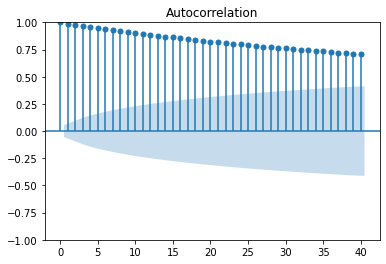

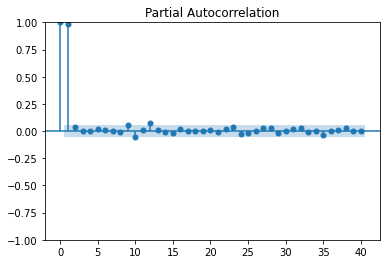

In [9]:
plot_acf(df['Close'], lags=40)
plt.show()
plot_pacf(df['Close'], lags=40)
plt.show()

Utilizando la librería **statsmodels** se calcularán y almacenarán los valores de ACF, PACF, el valor del estadístico Q (Ljung-Box Q statistic) y su valor en probabilidad.

In [10]:
acf_vals = acf(df['Close'], nlags=40)
pacf_vals = pacf(df['Close'], nlags=40)

In [11]:
q_stats = q_stat(acf_vals[1:], len(df['Close']))
q_stat_vals = q_stats[0]
p_values = q_stats[1]

Se va a crear un **diccionario** {} con los valores calculados que se llamará **acf_pacf_df**.

El uso de un diccionario en este código permite la creación de un **DataFrame** que organiza múltiples matrices relacionadas en columnas, lo que hace que los datos sean fáciles de analizar y visualizar. Las claves del diccionario ('Lag', 'ACF', 'PACF', 'Q-STAT', 'PROB') se convierten en los encabezados de las columnas y los valores correspondientes (matrices) son los datos de cada columna. Este formato estructurado permite la manipulación y el acceso eficiente a los datos mediante Pandas.

**Nota:**
Un diccionario en Python es una colección de pares clave-valor, donde cada clave es única y se asigna a un valor correspondiente. Permite la recuperación eficiente de datos por clave y se define usando llaves {} con claves y valores separados por dos puntos, así: {"key1": "value1", "key2": "value2"}.

In [12]:
acf_pacf_df = pd.DataFrame({
    'Lag': range(1,41),
    'ACF': acf_vals[1:],
    'PACF': pacf_vals[1:],
    'Q-STAT': q_stat_vals,
    'PROB': p_values
})

In [13]:
print(acf_pacf_df)

    Lag       ACF      PACF        Q-STAT           PROB
0     1  0.988512  0.989297   1233.172252  3.768119e-270
1     2  0.977927  0.036347   2441.037911   0.000000e+00
2     3  0.967474  0.002207   3624.160683   0.000000e+00
3     4  0.957073 -0.002658   4782.904450   0.000000e+00
4     5  0.947228  0.020799   5918.837110   0.000000e+00
5     6  0.937655  0.009628   7032.813587   0.000000e+00
6     7  0.928209  0.002177   8125.329129   0.000000e+00
7     8  0.918717 -0.006542   9196.470429   0.000000e+00
8     9  0.910446  0.053229  10249.254087   0.000000e+00
9    10  0.900987 -0.055647  11281.100981   0.000000e+00
10   11  0.891860  0.007462  12292.959423   0.000000e+00
11   12  0.884297  0.070307  13288.526019   0.000000e+00
12   13  0.876763  0.005758  14267.987001   0.000000e+00
13   14  0.869060 -0.012525  15231.085816   0.000000e+00
14   15  0.861074 -0.017862  16177.325704   0.000000e+00
15   16  0.853458  0.015676  17107.648676   0.000000e+00
16   17  0.845748 -0.001980  18

Usando la libreria **pandas** almacenaremos el DataFrame en un archivo con formarto CSV.

In [14]:
acf_pacf_df.to_csv('acf_pacf_table.csv', index=False)

**5.2. SERIE EN PRIMERA DIFERENCIA**

Utilizado la libreria de **pandas** vamos a generar una serie de tiempo **df_diff** con las diferencias **diff** a partir de los precios del instrumento.

Posteriormente se graficará ACF y PACF.

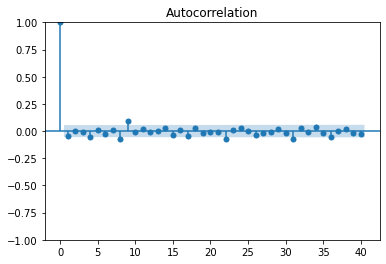

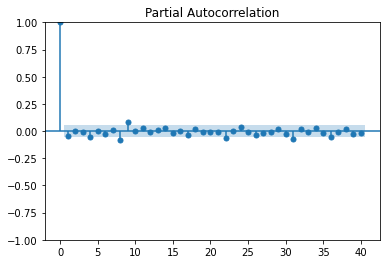

In [15]:
df_diff = df['Close'].diff().dropna()
plot_acf(df_diff, lags=40)
plt.show()
plot_pacf(df_diff, lags=40)
plt.show()

**5.2.1. EVAUACIÓN DE RESULTADOS**

Hasta este punto se recomienda que se contraste las gráficas de ACF y PACF tanto para la variable en niveles como la viriable en primera diferencia, con el propósito de evaluar si la serie es o no estacionaria, para sacar sus conclusiones puede utilizar las siguientes imágenes como referencia:

Ejemplo de correlograma de una serie de tiempo **No Estacionaria**:

<img src="No Estacionaria.png" alt="Drawing" style="width: 300px;"/>


Ejemplo de correlograma de una serie de tiempo **Estacionaria**:

<img src="Estacionaria.png" alt="Drawing" style="width: 300px;"/>

**5.3. TEST DE RAÍZ UNITARIA**

Se puede evaluar la estacionariedad de la serie de tiempo a través de pruebas de raíz unitaria.

**Prueba Dickey-Fuller aumentada (ADF)**
La prueba ADF se utiliza para determinar si una serie de tiempo es estacionaria o tiene raíz unitaria, lo que indica no estacionariedad.

**Hipótesis nula ($𝐻_0$​ ):** La serie temporal tiene raíz unitaria (es decir, no es estacionaria), se puede estimar mediante la siguiente ecuación:

$\Delta X_t = \alpha + \beta t + \gamma X_{t-1} + \sum_{i=1}^{p} \delta_i \Delta X_{t-i} + \epsilon_t$

*Dickey, D. A., & Fuller, W. A. (1979). Distribution of the estimators for autoregressive time series with a unit root. Journal of the American Statistical Association, 74(366a), 427-431.*

**Prueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**
La prueba KPSS se utiliza para probar la estacionariedad en una serie de tiempo.

**Hipótesis nula ($𝐻_0$​ ):** La serie temporal es estacionaria, se puede estimar mediante la siguiente ecuación:

$\eta_{\text{KPSS}} = \frac{1}{T^2} \sum_{t=1}^{T} \frac{S_t^2}{\hat{\sigma}^2}$

*Kwiatkowski, D., Phillips, P. C. B., Schmidt, P., & Shin, Y. (1992). Testing the null hypothesis of stationarity against the alternative of a unit root: How sure are we that economic time series have a unit root?. Journal of Econometrics, 54(1-3), 159-178.*

**5.3.1. DATOS EN NIVELES**

Utilizando la librería de **statsmodels** se realizarán las pruebas **Augmented Dickey-Fuller Test** y  **KPSS Test** con los datos en niveles.

Para cada prueba se va a generar un diccionario {} que permita la creación de un **DataFrame** que organiza múltiples matrices relacionadas en columnas, lo que hace que los datos sean fáciles de analizar y visualizar.

In [16]:
# Augmented Dickey-Fuller Test
adf_result = adfuller(df['Close'])
adf_output = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations': adf_result[3],
    'Critical Value (1%)': adf_result[4]['1%'],
    'Critical Value (5%)': adf_result[4]['5%'],
    'Critical Value (10%)': adf_result[4]['10%']
}

# KPSS Test
kpss_result = kpss(df['Close'], regression='c', nlags="auto")
kpss_output = {
    'Test Statistic': kpss_result[0],
    'p-value': kpss_result[1],
    'Lags Used': kpss_result[2],
    'Critical Value (1%)': kpss_result[3]['1%'],
    'Critical Value (5%)': kpss_result[3]['5%'],
    'Critical Value (10%)': kpss_result[3]['10%']
}

Ahora se creará otro diccionario {} para ordenar todos los resultados de las pruebas que permita la creación de un DataFrame que organiza múltiples matrices relacionadas en columnas, lo que hace que los datos sean fáciles de analizar y visualizar.

In [17]:
# Crear DataFrame con los resultados
unit_root_tests_df = pd.DataFrame({
    'Test': ['ADF', 'KPSS'],
    'Test Statistic': [adf_output['Test Statistic'], kpss_output['Test Statistic']],
    'p-value': [adf_output['p-value'], kpss_output['p-value']],
    'Lags Used': [adf_output['Lags Used'], kpss_output['Lags Used']],
    'Number of Observations': [adf_output['Number of Observations'], len(df['Close']) - kpss_output['Lags Used'] - 1],
    'Critical Value (1%)': [adf_output['Critical Value (1%)'], kpss_output['Critical Value (1%)']],
    'Critical Value (5%)': [adf_output['Critical Value (5%)'], kpss_output['Critical Value (5%)']],
    'Critical Value (10%)': [adf_output['Critical Value (10%)'], kpss_output['Critical Value (10%)']]
})

# Mostrar la tabla
print(unit_root_tests_df)

   Test  Test Statistic   p-value  Lags Used  Number of Observations  \
0   ADF       -0.681938  0.851373          9                    1249   
1  KPSS        4.163439  0.010000         20                    1238   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.435596            -2.863857             -2.568004  
1             0.739000             0.463000              0.347000  


**5.3.2. DATOS EN PRIMERA DIFERENCIA**

Se analizará la estacionariedad con los datos en primera diferencia **df_diff**.

In [18]:
# Augmented Dickey-Fuller Test
adf_result_diff = adfuller(df_diff)
adf_output_diff = {
    'Test Statistic': adf_result_diff[0],
    'p-value': adf_result_diff[1],
    'Lags Used': adf_result_diff[2],
    'Number of Observations': adf_result_diff[3],
    'Critical Value (1%)': adf_result_diff[4]['1%'],
    'Critical Value (5%)': adf_result_diff[4]['5%'],
    'Critical Value (10%)': adf_result_diff[4]['10%']
}

# KPSS Test
kpss_result_diff = kpss(df_diff, regression='c', nlags="auto")
kpss_output_diff = {
    'Test Statistic': kpss_result_diff[0],
    'p-value': kpss_result_diff[1],
    'Lags Used': kpss_result_diff[2],
    'Critical Value (1%)': kpss_result_diff[3]['1%'],
    'Critical Value (5%)': kpss_result_diff[3]['5%'],
    'Critical Value (10%)': kpss_result_diff[3]['10%']
}

# Crear DataFrame con los resultados
unit_root_tests_diff_df = pd.DataFrame({
    'Test': ['ADF', 'KPSS'],
    'Test Statistic': [adf_output_diff['Test Statistic'], kpss_output_diff['Test Statistic']],
    'p-value': [adf_output_diff['p-value'], kpss_output_diff['p-value']],
    'Lags Used': [adf_output_diff['Lags Used'], kpss_output_diff['Lags Used']],
    'Number of Observations': [adf_output_diff['Number of Observations'], len(df_diff) - kpss_output_diff['Lags Used'] - 1],
    'Critical Value (1%)': [adf_output_diff['Critical Value (1%)'], kpss_output_diff['Critical Value (1%)']],
    'Critical Value (5%)': [adf_output_diff['Critical Value (5%)'], kpss_output_diff['Critical Value (5%)']],
    'Critical Value (10%)': [adf_output_diff['Critical Value (10%)'], kpss_output_diff['Critical Value (10%)']]
})

# Mostrar la tabla
print(unit_root_tests_diff_df)


   Test  Test Statistic       p-value  Lags Used  Number of Observations  \
0   ADF      -11.986018  3.611718e-22          8                    1249   
1  KPSS        0.091583  1.000000e-01          9                    1248   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.435596            -2.863857             -2.568004  
1             0.739000             0.463000              0.347000  


**6. NUEVA SERIE DE TIEMPO CON LOS RENDIMIENTOS**

Utilizando la libreria de **pandas** vamos a generar una serie con los rendimientos diarios **$R_t$** (Holding Period Return).

$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100$

In [19]:
df_returns = df['Close'].pct_change().dropna()

**6.1. REPRESENTACIÓN GRÁFICA DE LOS RENDIMIENTOS**

Los **clusters de volatilidad** en series de tiempo financieras se refiere a la observación empírica de que los períodos de alta volatilidad tienden a ser seguidos por alta volatilidad, y los períodos de baja volatilidad tienden a ser seguidos por baja volatilidad.

Este fenómeno implica que **la volatilidad no es constante en el tiempo** sino que ocurre en ráfagas. Este efecto de agrupamiento (clustering) sugiere una varianza que varía en el tiempo en los rendimientos de los activos financieros, que a menudo se modela utilizando los modelos ARCH (heterocedasticidad condicional autorregresiva) y GARCH (ARCH generalizado). Estos modelos capturan la dependencia de la volatilidad actual de los rendimientos al cuadrado pasados ​​y de las volatilidades pasadas, lo que permite modelar y pronosticar con mayor precisión los riesgos del mercado financiero. La agrupación de volatilidad es importante para la gestión de riesgos, la fijación de precios de opciones y otras aplicaciones financieras donde comprender la dinámica de la volatilidad es crucial.

<img src="Volatility clustering.png" alt="Drawing" style="width: 400px;"/>

Utilizando la libreria **matplotlib** a continuación, se grafica la serie de tiempo de los rendimientos del instrumento financiero.

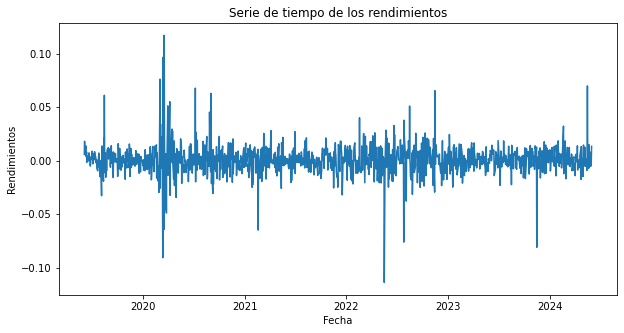

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df_returns)
plt.title('Serie de tiempo de los rendimientos')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.show()

Las series temporales financieras a menudo presentan **leptokurtosis** y **asimetría**, que son características clave que las distinguen de las series distribuidas normalmente.

**Leptokurtosis:**:
La leptokurtosis se refiere a la presencia de "colas gruesas" en la distribución de retorno, lo que significa que los valores extremos (tanto positivos como negativos) ocurren con más frecuencia de lo que predeciría una distribución normal. Los estudios empíricos han demostrado consistentemente que los rendimientos financieros tienen una curtosis mayor que la distribución normal. Esto implica que los mercados financieros experimentan grandes oscilaciones con mayor frecuencia, lo que genera mayores probabilidades de eventos extremos como crisis financieras o auges del mercado. La presencia de leptokurtosis afecta la gestión de riesgos y la fijación de precios de opciones, ya que los modelos que asumen normalidad subestiman la probabilidad de rendimientos extremos.

*Mandelbrot, B. (1963). The variation of certain speculative prices. Journal of Business, 36(4), 394-419.*

**Asimetría:**
La asimetría mide la asimetría de la distribución del rendimiento. La asimetría positiva indica que la distribución tiene una cola más larga a la derecha, mientras que la asimetría negativa indica una cola más larga a la izquierda. La evidencia empírica muestra que las distribuciones de rendimiento financiero a menudo muestran asimetría, generalmente negativa, lo que indica que los grandes rendimientos (pérdidas) negativos son más comunes que los grandes rendimientos (ganancias) positivos. Esta asimetría refleja las reacciones de los participantes del mercado ante la información negativa, lo que lleva a caídas más frecuentes y graves que a alzas.

*Cont, R. (2001). Empirical properties of asset returns: Stylized facts and statistical issues. Quantitative Finance, 1(2), 223-236.*

<img src="Kurtosis_skewness.png" alt="Drawing" style="width: 400px;"/>


A continuación, utilizando la librería **matplotlib** se presenta la gráfica de distribución de frecuencias.

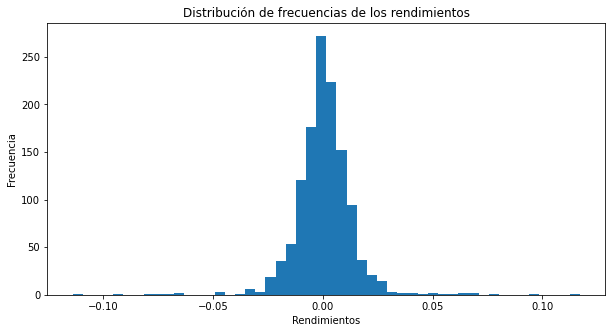

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(df_returns, bins=50)
plt.title('Distribución de frecuencias de los rendimientos')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.show()

**6.2. ESTADÍSTICAS DESCRIPTIVAS DE LOS RENDIMIENTOS**

Usando la librería de **pandas** podemos presentar un resumen de estadísticas descriptivas.

In [22]:
n_obs_ret = len(df_returns)
period_ret = df_returns.index[-1] - df_returns.index[0]
mean_ret = df_returns.mean()
median_ret = df_returns.median()
max_val_ret = df_returns.max()
min_val_ret = df_returns.min()
std_dev_ret = df_returns.std()
skewness_ret = stats.skew(df_returns)
kurtosis_ret = stats.kurtosis(df_returns)
jb_stat_ret, jb_p_value_ret = stats.jarque_bera(df_returns)

print(f"Número de observaciones: {n_obs_ret}")
print(f"Periodo de los datos: {period_ret}")
print(f"Promedio: {mean_ret}")
print(f"Mediana: {median_ret}")
print(f"Máximo: {max_val_ret}")
print(f"Mínimo: {min_val_ret}")
print(f"Desviación estándar: {std_dev_ret}")
print(f"Skewness: {skewness_ret}")
print(f"Kurtosis: {kurtosis_ret}")
print(f"Estadístico Jarque-Bera: {jb_stat_ret}")
print(f"Valor p de Jarque-Bera: {jb_p_value_ret}")

Número de observaciones: 1258
Periodo de los datos: 1823 days 00:00:00
Promedio: 0.0006231075500607202
Mediana: 0.0005321498421140269
Máximo: 0.11708508815306007
Mínimo: -0.11375748825148624
Desviación estándar: 0.014023767903236846
Skewness: 0.07437168013010773
Kurtosis: 14.826782326258542
Estadístico Jarque-Bera: 11524.097633822603
Valor p de Jarque-Bera: 0.0


**6.3. ESTACIONARIEDAD DE LA SERIE DE RENDIMIENTOS**

**6.3.1. FUNCIONES DE AUTOCORRELACIÓN Y CORRELOGRAMA**

A continuación, utilizando la librería **statsmodels** se presentan las gráficas ACF y PACF para la serie de rendimientos.

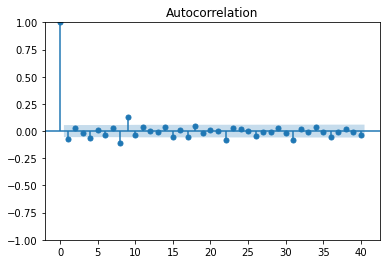

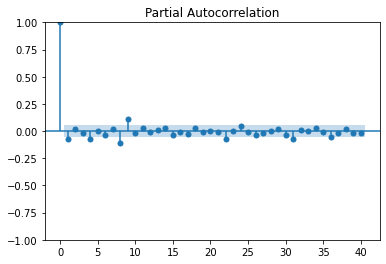

In [23]:
plot_acf(df_returns, lags=40)
plt.show()
plot_pacf(df_returns, lags=40)
plt.show()

**6.3.2. PRUEBAS DE RAÍZ UNITARIA EN LOS RENDIMIENTOS**

Se realizarán los test de raíz unitaria para la serie de rendimientos.

In [24]:
# Augmented Dickey-Fuller Test
adf_result_returns = adfuller(df_returns)
adf_output_returns = {
    'Test Statistic': adf_result_returns[0],
    'p-value': adf_result_returns[1],
    'Lags Used': adf_result_returns[2],
    'Number of Observations': adf_result_returns[3],
    'Critical Value (1%)': adf_result_returns[4]['1%'],
    'Critical Value (5%)': adf_result_returns[4]['5%'],
    'Critical Value (10%)': adf_result_returns[4]['10%']
}

# KPSS Test
kpss_result_returns = kpss(df_returns, regression='c', nlags="auto")
kpss_output_returns = {
    'Test Statistic': kpss_result_returns[0],
    'p-value': kpss_result_returns[1],
    'Lags Used': kpss_result_returns[2],
    'Critical Value (1%)': kpss_result_returns[3]['1%'],
    'Critical Value (5%)': kpss_result_returns[3]['5%'],
    'Critical Value (10%)': kpss_result_returns[3]['10%']
}

# Crear DataFrame con los resultados
unit_root_tests_returns_df = pd.DataFrame({
    'Test': ['ADF', 'KPSS'],
    'Test Statistic': [adf_output_returns['Test Statistic'], kpss_output_returns['Test Statistic']],
    'p-value': [adf_output_returns['p-value'], kpss_output_returns['p-value']],
    'Lags Used': [adf_output_returns['Lags Used'], kpss_output_returns['Lags Used']],
    'Number of Observations': [adf_output_returns['Number of Observations'], len(df_returns) - kpss_output_returns['Lags Used'] - 1],
    'Critical Value (1%)': [adf_output_returns['Critical Value (1%)'], kpss_output_returns['Critical Value (1%)']],
    'Critical Value (5%)': [adf_output_returns['Critical Value (5%)'], kpss_output_returns['Critical Value (5%)']],
    'Critical Value (10%)': [adf_output_returns['Critical Value (10%)'], kpss_output_returns['Critical Value (10%)']]
})

# Mostrar la tabla
print(unit_root_tests_returns_df)

   Test  Test Statistic       p-value  Lags Used  Number of Observations  \
0   ADF      -12.145544  1.613948e-22          8                    1249   
1  KPSS        0.063943  1.000000e-01         11                    1246   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.435596            -2.863857             -2.568004  
1             0.739000             0.463000              0.347000  


**7. ESTIMACIÓN DE LA VARIANZA A TRAVÉS DEL MODELO GARCH**

**7.1. DESCRIPCIÓN DE LOS MODELOS DE VARIANZA**

A continuación, se describen los modelos univariados de estimación de volatilidad, expuestos por:

*Vargas Sanchez, A. (2017). Estimación de la volatilidad de los fondos de inversión abiertos en Bolivia. Investigación & Desarrollo, 2(17), 21-47*.

**Modelo de varianza simple**

Este modelo calcula la varianza de una serie temporal como el promedio de los residuos cuadrados pasados ​​en una periodo de tamaño 𝑚.

$\sigma_n^2 = \frac{1}{m} \sum_{i=1}^{m} u_{n-i}^2$

**Modelo de varianza ponderada**

Este modelo calcula la varianza ponderando los residuos cuadrados pasados ​​con ponderaciones 𝛼𝑖.

$\sigma_n^2 = \sum_{i=1}^{m} \alpha_i u_{n-i}^2$

**Modelo de descomposición de varianza ponderada**

Este modelo descompone la varianza ponderada en un componente de varianza a largo plazo $𝑉_𝐿$ que está ponderada por 𝛾  y una suma de residuos al cuadrado pasados ​​ponderados por $\alpha_i$.

$\sigma_n^2 = \gamma V_L + \sum_{i=1}^{m} \alpha_i u_{n-i}^2$

**Modelo ARCH con 𝑚 Rezagos**

El modelo ARCH captura la varianza agregando un término constante 𝜔
a la suma ponderada de los residuos cuadrados pasados.

$\sigma_n^2 = \omega + \sum_{i=1}^{m} \alpha_i u_{n-i}^2$

*Engle, R. F. (1982). Autoregressive Conditional Heteroscedasticity with Estimates of the Variance of United Kingdom Inflation. Econometrica, 50(4), 987-1007*.

Otra formulación relaciona el término constante 𝜔 al componente de varianza a largo plazo 𝛾 $𝑉_𝐿$.

$\sigma_n^2 = \omega + \sum_{i=1}^{m} \alpha_i u_{n-i}^2$

Donde:
$\omega = \gamma V_L$

**Modelo ARCH(1)**

Este es un caso especial del modelo ARCH con un solo rezago.

$\sigma_n^2 = \omega + \alpha u_{n-1}^2$

**Modelo de media móvil ponderada exponencialmente (EWMA)**

El modelo EWMA calcula la varianza como un promedio ponderado de la varianza del período anterior y el residuo pasado al cuadrado, con ponderaciones λ y  (1−λ), respectivamente.

$\sigma_n^2 = \lambda \sigma_{n-1}^2 + (1 - \lambda) u_{n-1}^2$

*J.P. Morgan/Reuters (1996). RiskMetrics—Technical Document*.

**Modelo GARCH(1,1)**

El modelo GARCH amplía el modelo ARCH al incluir infinitas variaciones pasadas en el cálculo de la varianza. Agrega un término constante 𝜔, un término para residuos cuadrados pasados ​​y un término para varianzas pasadas.

$\sigma_n^2 = \gamma V_L + \alpha u_{n-1}^2 + \beta \sigma_{n-1}^2$

$\sigma_n^2 = \omega + \alpha u_{n-1}^2 + \beta \sigma_{n-1}^2$

Donde: $\omega = \gamma V_L$

*Bollerslev, T. (1986). Generalized Autoregressive Conditional Heteroskedasticity. Journal of Econometrics, 31(3), 307-327*.

**7.2. LIBRERÍA PARA LOS MODELOS ARCH Y GARCH**

Utilizando **pip** que es el instalador de paquetes para Python vamos a instalar la librería **arch**.

**pip** es una herramienta de línea de comandos y el instalador del paquete que permite instalar y administrar bibliotecas y dependencias adicionales que no están incluidas en la biblioteca estándar de Python. Con pip, puede descargar e instalar fácilmente paquetes desde Python Package Index (PyPI) y otros repositorios. Por ejemplo, para instalar un paquete, usaría un comando como pip install nombre_paquete.

In [25]:
pip install arch

De la librería arch importaremos la función **arch_model**, que está diseñada para modelar series de tiempo financieras utilizando modelos de heterocedasticidad condicional autorregresiva (ARCH) y modelos relacionados como GARCH.

Al crear un modelo ARCH o GARCH usando arch_model, las entradas principales son:


**y**: La variable dependiente (datos de series de tiempo).

**vol**: el tipo de modelo de volatilidad (por ejemplo, 'Garch', 'Arch').

**p**: El orden de retraso para el término ARCH.

**q**: El orden de retraso para el término GARCH.

**media**: el tipo de modelo de media (por ejemplo, 'Constante', 'Cero', 'AR').

**rezagos**: el número de rezagos que se incluirán en el modelo medio.

**dist**: La distribución que se asumirá para los errores (por ejemplo, 'normal', 't').


In [26]:
from arch import arch_model

**7.3. ESTIMACIÓN DEL MODELO GARCH**

La configuración de garch_model que usaremos es la siguiente:

$\sigma_n^2 = \omega + \alpha u_{n-1}^2 + \beta \sigma_{n-1}^2$


Variable dependiente (y): df_returns: los datos de la serie temporal de las devoluciones.

Modelo de volatilidad (vol): 'Garch': especifica que el modelo utilizado es un modelo GARCH.

Orden ARCH (p): 1: el orden de rezago para el término ARCH, que indica que el modelo incluye un rezago de los residuos cuadrados pasados.

Orden GARCH (q): 1: el orden de rezago para el término GARCH, que indica que el modelo incluye un rezago de varianzas condicionales pasadas.

In [27]:
garch_model = arch_model(df_returns, vol='Garch', p=1, q=1).fit()
print(garch_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.774976070704144e+16
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3721.4580935274
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3721.4580955937486
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3721.46
Distribution:                  Normal   AIC:                          -7434.92
Method:            Maximum Likelihood   BIC:                          -7414.37
                                        No. Observations:                 1258
Date:                Sun, Jun 02 2024   Df Residuals:                     1257
Time:       

**7.3.1. MODELO DE LOS RENDIMIENTOS**

Cuando se ejecuta un modelo GARCH con una media constante (𝜇) para los rendimientos, el modelo supone que los rendimientos se generan mediante una media constante más un componente de volatilidad que varía con el tiempo. En esta configuración, los residuos del modelo, que son las diferencias entre los rendimientos observados y la media constante, **capturan toda la estructura dinámica de los rendimientos**.

El modelo GARCH descompone los rendimientos en patrones de volatilidad y shocks predecibles (residuales). Por tanto, **los residuos explican perfectamente la dinámica de los rendimientos** porque representan los cambios o innovaciones inesperados que no son capturados por la media constante. Estos residuos son cruciales para comprender la volatilidad variable en el tiempo y la agrupación de los rendimientos, que son aspectos centrales del modelado de series de tiempo financieras con GARCH.

A continuación, extraemos los residuos del modelo estimado y lo graficamos en un diagrama de dispersión respecto a la serie de rendimientos.
Los resultados muestran que la relación es directa y perfecta.

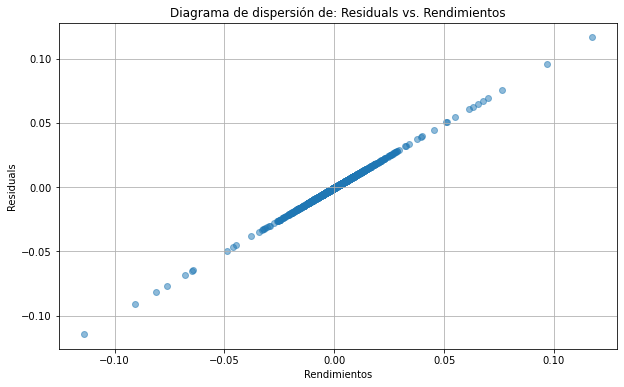

In [28]:
# Extraemos los residuals
residuals = garch_model.resid

# Creamos un diagrama de dispersión entre los residuals vs. returns
plt.figure(figsize=(10, 6))
plt.scatter(df_returns.values.flatten(), residuals, alpha=0.5)
plt.xlabel('Rendimientos')
plt.ylabel('Residuals')
plt.title('Diagrama de dispersión de: Residuals vs. Rendimientos')
plt.grid(True)
plt.show()

**7.4. PRUEBAS AL MODELO**

**Evaluaremos las propiedades de los residuos en el modelo GARCH estimado**.

Importaremos las siguientes librerías:

**scipy.stats jarque_bera**
Es un módulo de la biblioteca SciPy que proporciona una amplia gama de funciones y pruebas estadísticas. La prueba jarque_bera se utiliza para verificar si una muestra de datos tiene la asimetría y la curtosis que coinciden con una distribución normal, probando la normalidad de los datos.

**statsmodels.stats.diagnostic acorr_ljungbox**
Es un módulo de la biblioteca statsmodels que proporciona pruebas de diagnóstico para modelos estadísticos. La prueba acorr_ljungbox se utiliza para comprobar la autocorrelación en los residuos de un modelo de series de tiempo, evaluando si los residuos se distribuyen de forma independiente.

**statsmodels.stats.diagnostic het_arch**
Este módulo de la biblioteca statsmodels proporciona pruebas de diagnóstico para modelos estadísticos. La prueba het_arch se utiliza para detectar efectos de heterocedasticidad condicional autorregresiva (ARCH) en una serie de tiempo, evaluando si la varianza de los residuos depende del tiempo.

In [29]:
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch

**Test de Normalidad**

La hipótesis nula $H_0$ en la prueba de Jarque-Bera es que los residuos se distribuyen normalmente. Esto significa que la asimetría y la curtosis de los residuos coinciden con las de una distribución normal.

**Nota:**

Cuando los errores en un modelo econométrico no se distribuyen normalmente, pueden generar estimaciones sesgadas e ineficientes, lo que hace que los resultados no sean confiables.

Suponer errores distribuidos normalmente es particularmente crucial en muestras de tamaño pequeño porque, en tales casos, el teorema del límite central no se aplica. Este teorema establece que la distribución de la media muestral se acerca a la normalidad a medida que aumenta el tamaño de la muestra. Sin embargo, si los errores no se distribuyen normalmente, los estimadores pueden volverse sesgados e ineficientes, y las pruebas de hipótesis y los intervalos de confianza pueden no ser confiables. Al asumir normalidad, aseguramos que la distribución de las estadísticas de prueba se aproxima mucho a sus distribuciones teóricas, lo que permite inferencias válidas. Este supuesto ayuda a mantener la confiabilidad de las técnicas econométricas estándar, lo que facilita la obtención de resultados precisos en muestras pequeñas.

In [30]:
#Test de Normalidad

residuals = garch_model.resid
jb_test = jarque_bera(residuals)

print(f"Estadístico Jarque-Bera: {jb_test[0]}")
print(f"p-value: {jb_test[1]}")

Estadístico Jarque-Bera: 11524.097633822603
p-value: 0.0


**Test de autocorrelación**

La hipótesis nula $H_0$ en la prueba de Ljung-Box es que **no existe autocorrelación en los residuos** en ninguno de los rezagos especificados.
Esto significa que los residuos se distribuyen de forma independiente y no existe un patrón significativo de autocorrelación.

**Nota:**

La autocorrelación, o correlación serial, ocurre cuando los residuos (errores) en un modelo econométrico están correlacionados entre períodos de tiempo. Esto viola el supuesto clásico de independencia entre errores, lo que lleva a estimaciones de parámetros sesgadas e ineficientes y a errores estándar no válidos. Como resultado, las pruebas de hipótesis pueden arrojar conclusiones engañosas y los intervalos de confianza pueden ser incorrectos. La autocorrelación es particularmente problemática en los datos de series temporales, donde las observaciones se ordenan naturalmente en el tiempo. Si hay autocorrelación, las soluciones incluyen agregar variables dependientes rezagadas, usar diferenciación o aplicar mínimos cuadrados generalizados (GLS) para obtener estimaciones insesgadas y eficientes.

In [31]:
#Test de autocorrelación

ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljungbox_test)

      lb_stat     lb_pvalue
10  53.291478  6.573095e-08


**Test de heterocedasticidad**

La hipótesis nula $H_0$ en la prueba ARCH (usando het_arch) es que **no hay efecto ARCH en los residuos**. Esto significa que los residuos **exhiben una varianza constante (homoscedasticidad)** a lo largo del tiempo y no hay presente volatilidad variable en el tiempo (heteroscedasticidad).

**Nota:**

La heteroscedasticidad ocurre cuando la varianza de los residuos (errores) en un modelo econométrico no es constante entre las observaciones. Esto viola el supuesto de homocedasticidad, donde los residuos tienen una varianza constante. La heteroscedasticidad puede conducir a estimaciones ineficientes y errores estándar no válidos, lo que hace que las pruebas de hipótesis y los intervalos de confianza no sean confiables. Es particularmente problemático en datos transversales, donde la varianza de la variable dependiente puede cambiar con el nivel de una variable independiente. Las soluciones incluyen transformar variables (por ejemplo, transformación logarítmica), utilizar errores estándar robustos a la heterocedasticidad o aplicar mínimos cuadrados ponderados (WLS) para obtener estimaciones eficientes. Abordar la heterocedasticidad garantiza que el modelo econométrico produzca resultados de soluciones confiables.

In [32]:
#Test de heterocedasticidad

arch_test = het_arch(residuals)
print(f"LM Statistic: {arch_test[0]}")
print(f"LM Test p-value: {arch_test[1]}")
print(f"F-Statistic: {arch_test[2]}")
print(f"F-Test p-value: {arch_test[3]}")

LM Statistic: 202.728132966064
LM Test p-value: 4.352873274999717e-38
F-Statistic: 23.991337410679535
F-Test p-value: 1.0816949657752748e-41


**7.4. PARÁMETROS DEL MODELO**

Usando la librería **arch** extraemos los parámetros del modelo estimado.

In [33]:
params = garch_model.params
omega = params['omega']
alpha1 = params['alpha[1]']
beta1 = params['beta[1]']

print(f"Constante (omega): {omega}")
print(f"Coeficiente alpha1: {alpha1}")
print(f"Coeficiente beta1: {beta1}")

Constante (omega): 1.9650971136550855e-05
Coeficiente alpha1: 0.09999998854393984
Coeficiente beta1: 0.7999999083515187


**7.5. VARIANZA DE LARGO PLAZO Y VOLATILIDAD**

En base a los parámetros extraídos realizamos el cálculo de la varianza de largo plazo y la volatilidad de largo plazo.

$V_L = \frac{\omega}{1 - \alpha - \beta}$

Luego anualizamos la volatilidad:

$\text{Annual Volatility} = \text{Daily Volatility} \times \sqrt{\text{Time}}$

$\sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{\text{T}}$


In [34]:
long_term_variance = omega / (1 - alpha1 - beta1)
long_term_volatility = long_term_variance**0.5
annualized_volatility = long_term_volatility * (252**0.5)

print(f"Varianza de largo plazo: {long_term_variance}")
print(f"Volatilidad diaria: {long_term_volatility}")
print(f"Volatilidad anualizada: {annualized_volatility}")

Varianza de largo plazo: 0.00019650950875528067
Volatilidad diaria: 0.01401818493084182
Volatilidad anualizada: 0.2225317869571238


**7.6. PROYECCIÓN DE LA VARIANZA Y LA DESVIACIÓN ESTÁNDAR**

Ahora utilizando la librería **arch** se realizará el pronóstico de la varianza para 20 periodos n=20, utilizando el modelo estimado.

$\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2$

$\sigma_{t+1}^2 = \omega + \alpha \epsilon_{t}^2 + \beta \sigma_{t}^2$

$\sigma_{t+n}^2 = \omega + \alpha \epsilon_{t+n-1}^2 + \beta \sigma_{t+n-1}^2$

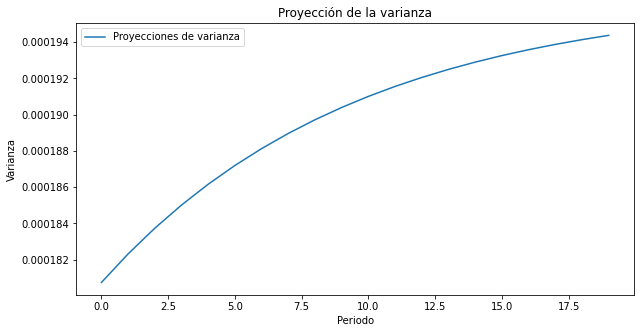

In [35]:
forecast = garch_model.forecast(horizon=20)
variance_forecast = forecast.variance[-1:]


plt.figure(figsize=(10, 5))
plt.plot(variance_forecast.values.flatten(), label='Proyecciones de varianza')
plt.title('Proyección de la varianza')
plt.xlabel('Periodo')
plt.ylabel('Varianza')
plt.legend()
plt.show()

A continuación, se aplicará la función de raíz cuadrada por elementos al DataFrame **variance_forecast** utilizando la función **sqrt** de **numpy**. Convierte las variaciones pronosticadas en desviaciones estándar y almacena el resultado en **std_dev_forecast**.

In [36]:
std_dev_forecast = variance_forecast.apply(np.sqrt)

A continuación, se genera una proyección de las desviaciones estándar futuras para una serie temporal determinada de rendimientos.
Primero se crea un rango de 20 **fechas comerciales** futuras (freq='B') a partir del día posterior a la última fecha en el marco de datos **df_returns** usando **pd.date_range**.

Posibles frecuencias de la función:

'D': Calendar day frequency.

'B': Business day frequency (excluding weekends and holidays).

'W': Weekly frequency (defaulting to the end of the week).

'M': Month end frequency.

'SM': Semi-month end frequency (15th and end of month).

'BM': Business month end frequency.

'CBM': Custom business month end frequency.

'MS': Month start frequency.

'BMS': Business month start frequency.

'Q': Quarter end frequency.

'BQ': Business quarter end frequency.

'QS': Quarter start frequency.

'BQS': Business quarter start frequency.

'A' or 'Y': Year end frequency.

'BA' or 'BY': Business year end frequency.

'AS' or 'YS': Year start frequency.

'BAS' or 'BYS': Business year start frequency.

'H': Hourly frequency.

'T' or 'min': Minute frequency.

'S': Second frequency.

'L' or 'ms': Millisecond frequency.

'U' or 'us': Microsecond frequency.

'N': Nanosecond frequency.

*df_returns.index[-1]* tiene el propósito de acceder a la **última fecha en el índice del DataFrame df_returns**. df_returns.index proporciona el índice del DataFrame, que en este caso se supone que son fechas. [-1] selecciona el último elemento del índice, que es la fecha más reciente de sus datos.

*pd.Timedelta(días=1)* crea un delta de tiempo que represente un día.
pd.Timedelta es una función de Pandas para representar una duración de tiempo. días=1 especifica que esta duración es de un día.

*df_returns.index[-1] + pd.Timedelta(días=1)* permite calcular el día siguiente a la última fecha en su DataFrame. Al Agregar un pd.Timedelta(days=1) a la última fecha en su índice avanza la fecha un día. Esto le proporciona la fecha de inicio de la proyección.

*pd.date_range(inicio=..., periodos=20, frecuencia='B')* crea un rango de fechas futuras a partir de la fecha de inicio calculada.

Luego se construye un nuevo DataFrame, **proyección_df**, con dos columnas: 'Fecha', que contiene las fechas futuras generadas, y 'Desviación Estándar Proyectada', que contiene las desviaciones estándar pronosticadas derivadas de la matriz std_dev_forecast.

Finalmente, se imprime el DataFrame para mostrar las desviaciones estándar proyectadas para las fechas futuras especificadas. Esto proporciona una representación tabular clara de la volatilidad prevista para los próximos días hábiles.

In [37]:
projection_dates = pd.date_range(start=df_returns.index[-1] + pd.Timedelta(days=1), periods=20, freq='B')
projection_df = pd.DataFrame({
    'Fecha': projection_dates,
    'Desviación Estándar Proyectada': std_dev_forecast.values.flatten()
})

print(projection_df)

        Fecha  Desviación Estándar Proyectada
0  2024-06-03                        0.013444
1  2024-06-04                        0.013503
2  2024-06-05                        0.013555
3  2024-06-06                        0.013602
4  2024-06-07                        0.013644
5  2024-06-10                        0.013682
6  2024-06-11                        0.013716
7  2024-06-12                        0.013747
8  2024-06-13                        0.013774
9  2024-06-14                        0.013799
10 2024-06-17                        0.013821
11 2024-06-18                        0.013841
12 2024-06-19                        0.013858
13 2024-06-20                        0.013875
14 2024-06-21                        0.013889
15 2024-06-24                        0.013902
16 2024-06-25                        0.013914
17 2024-06-26                        0.013924
18 2024-06-27                        0.013934
19 2024-06-28                        0.013942


En base a las proyecciones a continuación, se presenta en forma gráfica y se incluye la volatilidad incondicional de largo plazo que muestra el nivel de riesgo actual del activo.

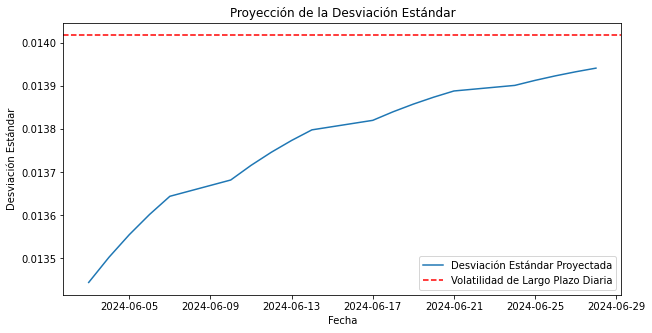

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(projection_dates, std_dev_forecast.values.flatten(), label='Desviación Estándar Proyectada')
plt.axhline(y=long_term_volatility, color='r', linestyle='--', label='Volatilidad de Largo Plazo Diaria')
plt.title('Proyección de la Desviación Estándar')
plt.xlabel('Fecha')
plt.ylabel('Desviación Estándar')
plt.legend()
plt.show()

**7.7. ESPECIFICACIÓN AUTOMÁTICA DEL MODELO GARCH**

La automatización de la selección de parámetros del modelo GARCH se basa en el principio de optimizar el ajuste del modelo y al mismo tiempo equilibrar la complejidad.

El objetivo es identificar el modelo que capture mejor la estructura de datos subyacente con la menor cantidad de error, normalmente utilizando criterios como el Criterio de información de Akaike (AIC) o el Criterio de información bayesiano (BIC). Estos criterios penalizan los modelos por su complejidad para evitar el sobreajuste, asegurando así que el modelo elegido sea preciso y generalizable. Al evaluar sistemáticamente una variedad de modelos posibles, el proceso selecciona el que tiene el equilibrio óptimo entre bondad de ajuste y complejidad.

El código proporcionado realiza una búsqueda en la cuadrícula para seleccionar automáticamente el mejor modelo GARCH basado en el AIC. Evalúa diferentes combinaciones de órdenes AR (autoregresivas) y MA (media móvil).

**Grid search loop:** Se formula un bucle de búsqueda de cuadrícula, es una forma metódica de evaluar múltiples modelos variando sistemáticamente sus parámetros y seleccionando el mejor en función de un criterio predefinido, como el Criterio de información de Akaike (AIC).

Aquí hay un desglose detallado de cada parte del ciclo:


*   Primero, se configura las variables para realizar un seguimiento del mejor modelo encontrado durante la búsqueda.
*   Usamos **nested for loops** (bucles para anidados) para iterar sobre un rango de valores posibles para los parámetros p y q. Estos parámetros representan el orden de los componentes AR (autoregresivo) y MA (media móvil) del modelo GARCH, respectivamente.

*   Dentro del bucle interno, intentamos ajustar un modelo GARCH usando la combinación actual de p y q. La función arch_model se utiliza para especificar el modelo y se llama a fit() para estimar sus parámetros.
*  Después de ajustar el modelo, comprobamos su valor AIC. Si este valor es inferior al mejor AIC actual, actualizamos nuestros registros del mejor modelo, mejor orden y mejor AIC.

*   Manejo de excepciones, si se produce algún error durante el ajuste del modelo (por ejemplo, debido a no convergencia o combinaciones de parámetros no válidas), el bloque except los detecta y el ciclo continúa con el siguiente conjunto de parámetros.

In [39]:
# Estimación de un modelo ARCH/GARCH con selección automática del órden
best_aic = float('inf')
best_order = None
best_model = None

for p in range(1, 5):
    for q in range(1, 5):
        try:
            model = arch_model(df_returns, vol='Garch', p=p, q=q)
            fitted_model = model.fit(disp='off')
            if fitted_model.aic < best_aic:
                best_aic = fitted_model.aic
                best_order = (p, q)
                best_model = fitted_model
        except Exception as e:
            continue

print(f'Best AIC: {best_aic}')
print(f'Best Order: {best_order}')
print(best_model.summary())

Best AIC: -7434.916191187497
Best Order: (1, 1)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3721.46
Distribution:                  Normal   AIC:                          -7434.92
Method:            Maximum Likelihood   BIC:                          -7414.37
                                        No. Observations:                 1258
Date:                Sun, Jun 02 2024   Df Residuals:                     1257
Time:                        20:32:45   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu     

In [40]:
# Extraer los últimos 5 valores de los rendimientos y de los residuos
last_returns = df_returns.tail(5)
print("Last returns:")
print(last_returns)

Last returns:
Date
2024-05-24    0.008328
2024-05-28   -0.005200
2024-05-29   -0.001845
2024-05-30   -0.000462
2024-05-31    0.013407
Name: Close, dtype: float64


In [41]:
last_residuals = residuals.tail(5)
print("Last residuals:")
print(last_residuals)

Last residuals:
Date
2024-05-24    0.007716
2024-05-28   -0.005813
2024-05-29   -0.002457
2024-05-30   -0.001074
2024-05-31    0.012795
Name: resid, dtype: float64


**8. CONCLUSIONES**

Jupyter Notebook sirve efectivamente como una guía completa para comprender e implementar modelos de volatilidad univariados en econometría financiera. Siguiendo las secciones estructuradas, los usuarios pueden obtener una comprensión sólida de los fundamentos teóricos y las aplicaciones prácticas de los modelos ARCH y GARCH. El enfoque paso a paso de la herramienta, desde la recopilación de datos hasta la evaluación del modelo, garantiza que los usuarios puedan replicar y aplicar estas técnicas a sus conjuntos de datos. Las aplicaciones prácticas resaltan la importancia de estos modelos para pronosticar con precisión la volatilidad y gestionar los riesgos financieros, lo que los convierte en un recurso valioso para estudiantes, investigadores y profesionales en el campo de las finanzas.